# FIFA Score Analysis

## Importing modules and data

In [1]:
# Importing modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Importing Dataset
df= pd.read_csv('Dataset/fifa.csv')

In [9]:
df.head()

,Date,ARG,BRA,ESP,FRA,GER,ITA
0,1993-08-08,5.0,8.0,13.0,12.0,1.0,2.0
1,1993-09-23,12.0,1.0,14.0,7.0,5.0,2.0
2,1993-10-22,9.0,1.0,7.0,14.0,4.0,3.0
3,1993-11-19,9.0,4.0,7.0,15.0,3.0,1.0
4,1993-12-23,8.0,3.0,5.0,15.0,1.0,2.0


## Data Description:
The dataset shows the date of the match and number of goals scored by Argentina, Brazil, Portugal, France, Germany and Italy.

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         286 non-null    datetime64[ns]
 1   ARG          286 non-null    float64       
 2   BRA          286 non-null    float64       
 3   ESP          286 non-null    float64       
 4   FRA          286 non-null    float64       
 5   GER          286 non-null    float64       
 6   ITA          286 non-null    float64       
 7   Match Day    286 non-null    int64         
 8   Match Month  286 non-null    object        
 9   Match Year   286 non-null    int64         
dtypes: datetime64[ns](1), float64(6), int64(2), object(1)
memory usage: 22.5+ KB


In [8]:
df.describe()

,ARG,BRA,ESP,FRA,GER,ITA
count,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000
mean,5.454545,3.171329,5.321678,8.958042,5.104895,8.353147
std,4.012659,3.620897,3.908787,6.822948,4.354813,4.514822
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.000000,1.000000,2.000000,3.000000,2.000000,4.000000
50%,5.000000,1.500000,5.000000,7.000000,4.000000,8.000000
75%,7.000000,4.000000,8.000000,15.000000,5.000000,12.000000
max,24.000000,22.000000,25.000000,27.000000,22.000000,20.000000


In [6]:
# Changing Dtype of Date column from object to datetime.
df['Date'] = pd.to_datetime(df['Date'])

In [11]:
# Adding columns such as day, month, and year
df['Match Day'] = df['Date'].dt.day
df['Match Month'] = df['Date'].dt.month_name()
df['Match Year'] = df['Date'].dt.year

In [12]:
df.sample(5)

,Date,ARG,BRA,ESP,FRA,GER,ITA,Match Day,Match Month,Match Year
188,2010-04-28,7.0,1.0,2.0,10.0,6.0,5.0,28,April,2010
214,2012-07-04,7.0,11.0,1.0,14.0,2.0,6.0,4,July,2012
164,2008-04-09,1.0,2.0,4.0,7.0,5.0,3.0,9,April,2008
279,2017-12-21,4.0,2.0,6.0,9.0,1.0,14.0,21,December,2017
216,2012-09-05,7.0,12.0,1.0,15.0,2.0,6.0,5,September,2012


## Data Visualization

### Month Based Visualization

In [13]:
# Visual Python: Logic > code
plt.rc('figure', figsize=(12, 8))
from matplotlib import rcParams
rcParams['font.size'] = 10
rcParams['axes.unicode_minus'] = False

In [22]:
# Visual Python: Visualization > Seaborn
def vp_seaborn_show_values(axs, precision=1, space=0.01):
    pstr = '{:.' + str(precision) + 'f}'
    
    def _single(ax):
        # check orient
        orient = 'v'
        if len(ax.patches) == 1:
            # check if 0
            if ax.patches[0].get_x() == 0:
                orient = 'h'
        else:
            # compare 0, 1 patches
            p0 = ax.patches[0]
            p1 = ax.patches[1]
            if p0.get_x() == p1.get_x():
                orient = 'h'
                
        if orient == 'v':
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*space)
                if not np.isnan(_x) and not np.isnan(_y):
                    value = pstr.format(p.get_height())
                    ax.text(_x, _y, value, ha='center') 
        elif orient == 'h':
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + (space - 0.01)
                _y = p.get_y() + p.get_height() / 2
                if not np.isnan(_x) and not np.isnan(_y):
                    value = pstr.format(p.get_width())
                    ax.text(_x, _y, value, ha='left')

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

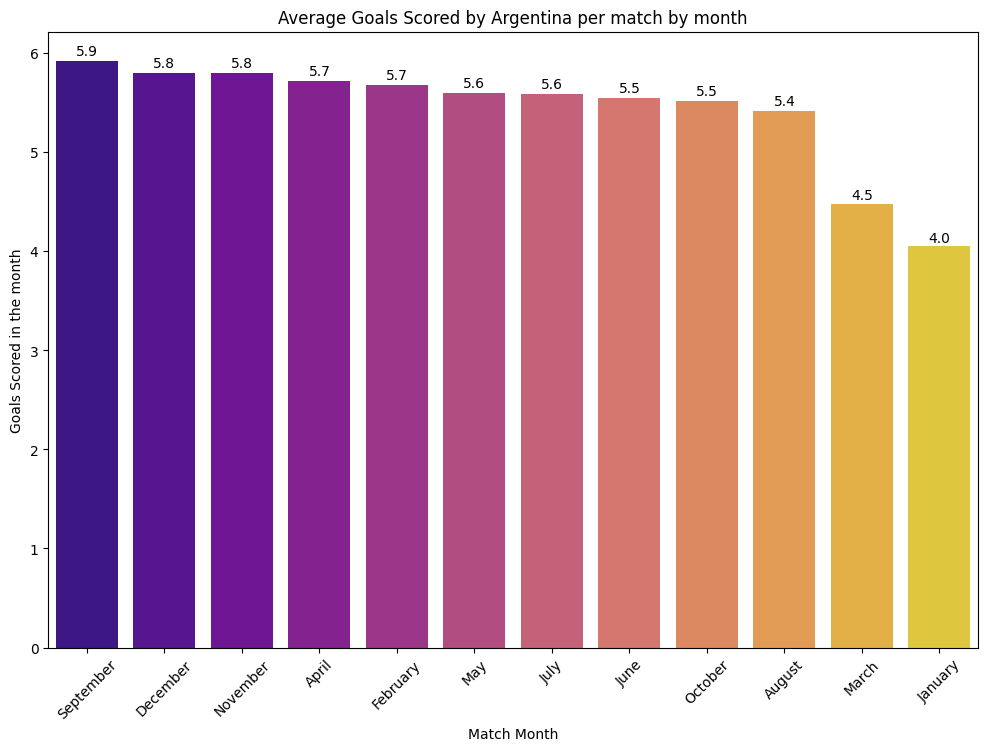

In [32]:
ax= sns.barplot(data= df, x= 'Match Month', y= 'ARG', errorbar= None,
                order= df.groupby('Match Month')['ARG'].mean().sort_values(ascending= False).index,
                palette= 'plasma')
plt.ylabel('Goals Scored in the month')
plt.title('Average Goals Scored by Argentina per match by month')
vp_seaborn_show_values(ax)
plt.xticks(rotation= 45)
plt.show()

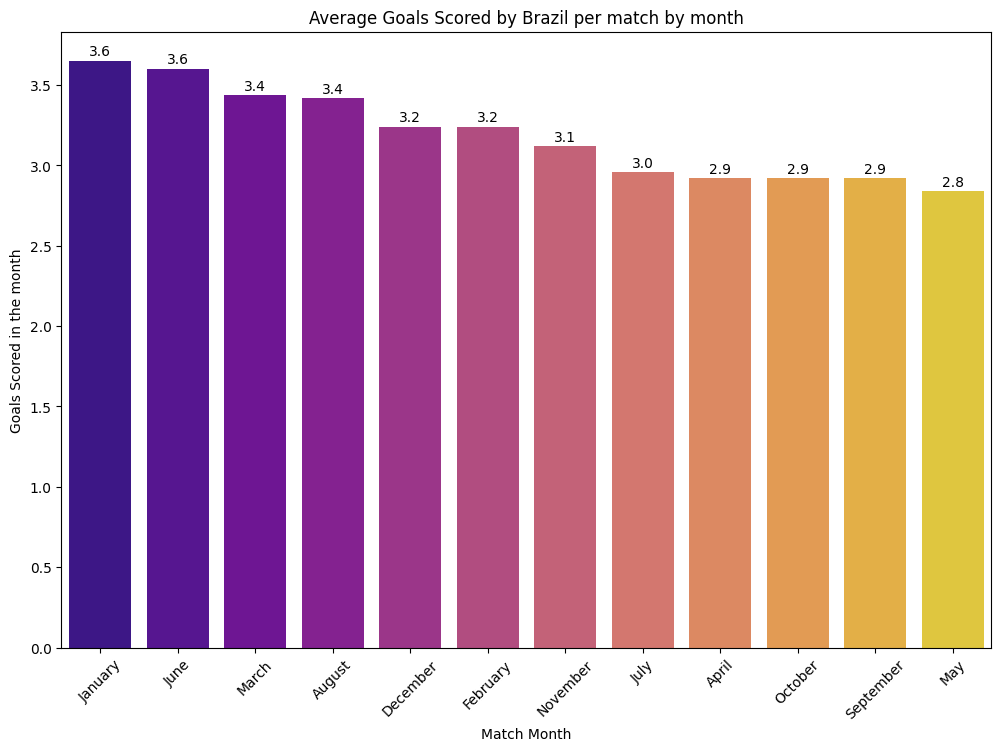

In [33]:
yval= 'BRA'
ax= sns.barplot(data= df, x= 'Match Month', y= yval, errorbar= None,
                order= df.groupby('Match Month')[yval].mean().sort_values(ascending= False).index,
                palette= 'plasma')
plt.ylabel('Goals Scored in the month')
plt.title('Average Goals Scored by Brazil per match by month')
vp_seaborn_show_values(ax)
plt.xticks(rotation= 45)
plt.show()

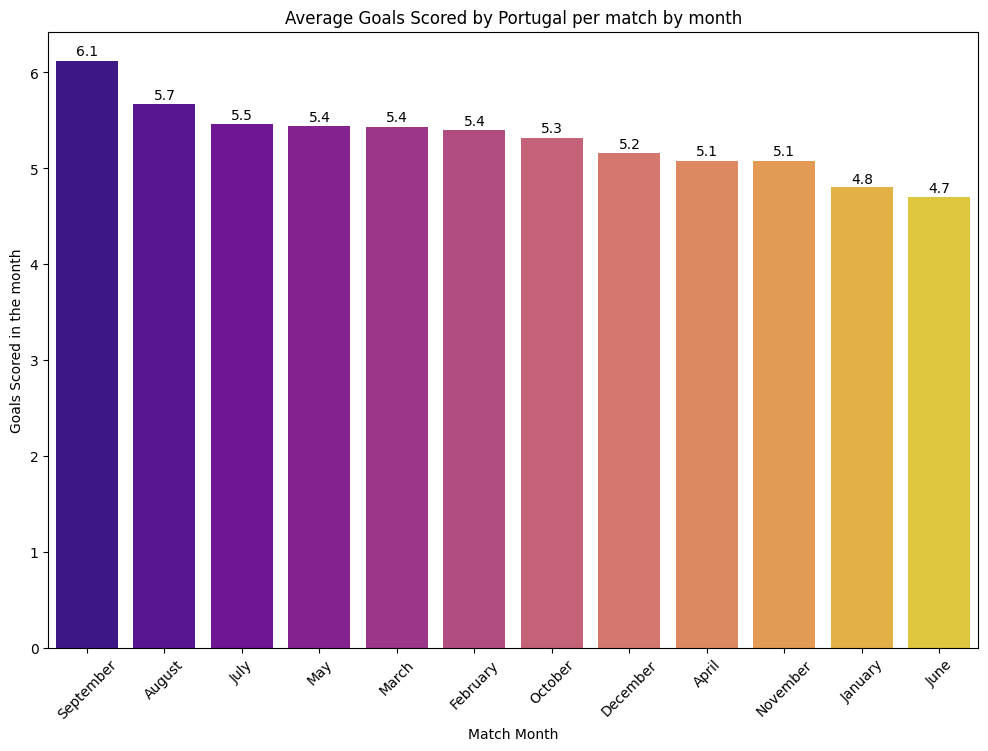

In [35]:
yval= 'ESP'
ax= sns.barplot(data= df, x= 'Match Month', y= yval, errorbar= None,
                order= df.groupby('Match Month')[yval].mean().sort_values(ascending= False).index,
                palette= 'plasma')
plt.ylabel('Goals Scored in the month')
plt.title('Average Goals Scored by Portugal per match by month')
vp_seaborn_show_values(ax)
plt.xticks(rotation= 45)
plt.show()

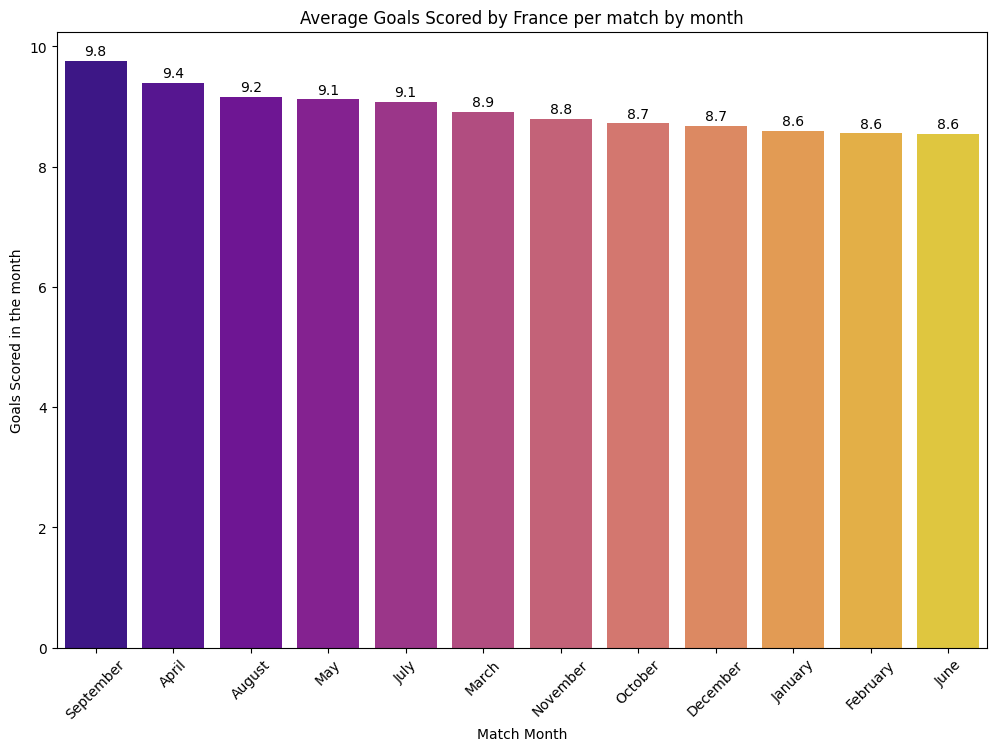

In [36]:
yval= 'FRA'
ax= sns.barplot(data= df, x= 'Match Month', y= yval, errorbar= None,
                order= df.groupby('Match Month')[yval].mean().sort_values(ascending= False).index,
                palette= 'plasma')
plt.ylabel('Goals Scored in the month')
plt.title('Average Goals Scored by France per match by month')
vp_seaborn_show_values(ax)
plt.xticks(rotation= 45)
plt.show()

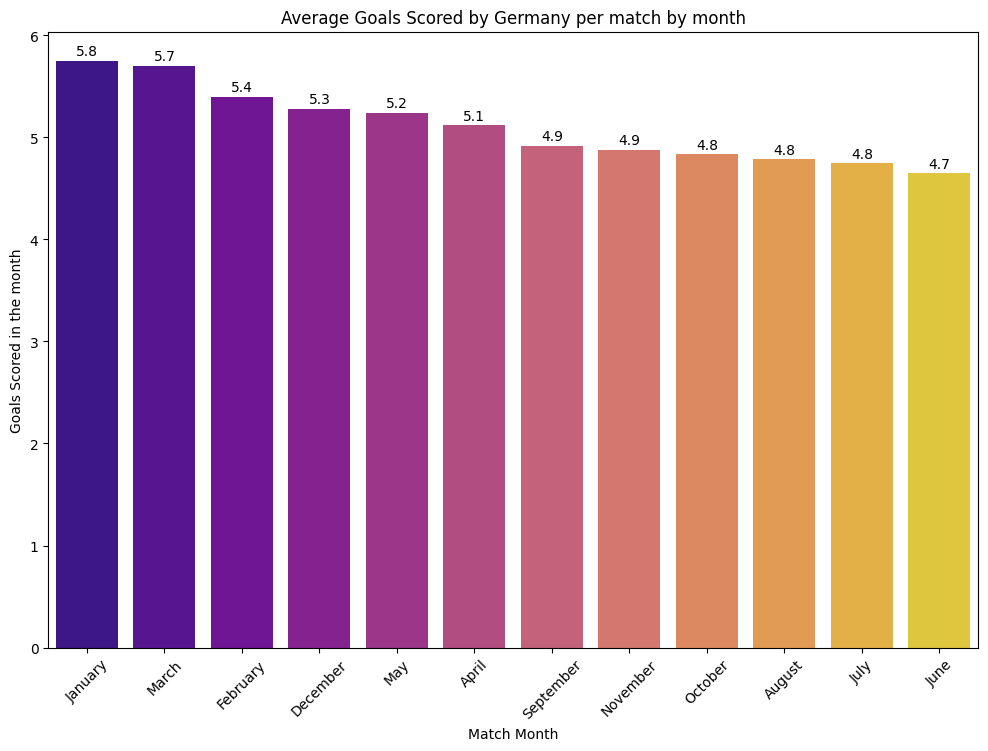

In [37]:
yval= 'GER'
ax= sns.barplot(data= df, x= 'Match Month', y= yval, errorbar= None,
                order= df.groupby('Match Month')[yval].mean().sort_values(ascending= False).index,
                palette= 'plasma')
plt.ylabel('Goals Scored in the month')
plt.title('Average Goals Scored by Germany per match by month')
vp_seaborn_show_values(ax)
plt.xticks(rotation= 45)
plt.show()

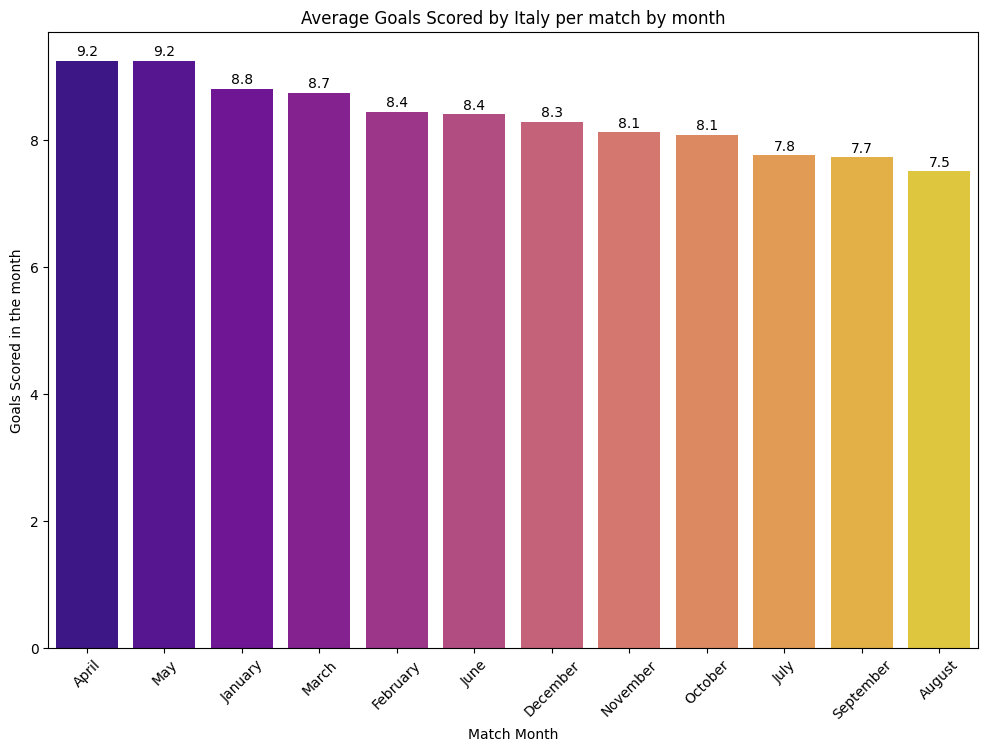

In [38]:
yval= 'ITA'
ax= sns.barplot(data= df, x= 'Match Month', y= yval, errorbar= None,
                order= df.groupby('Match Month')[yval].mean().sort_values(ascending= False).index,
                palette= 'plasma')
plt.ylabel('Goals Scored in the month')
plt.title('Average Goals Scored by Italy per match by month')
vp_seaborn_show_values(ax)
plt.xticks(rotation= 45)
plt.show()

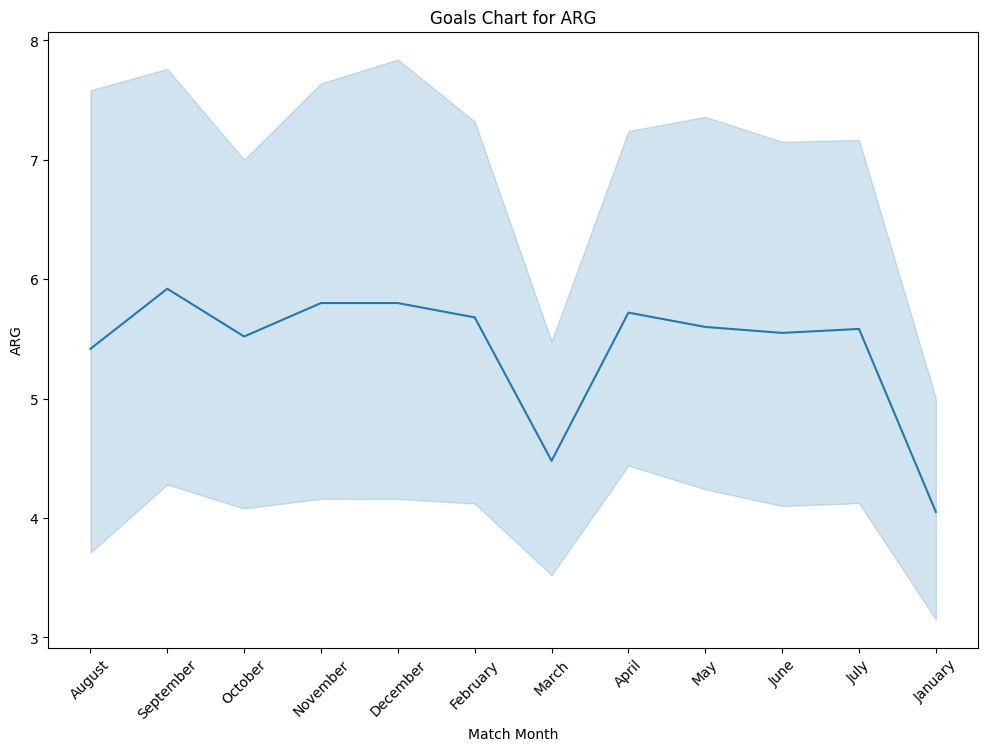

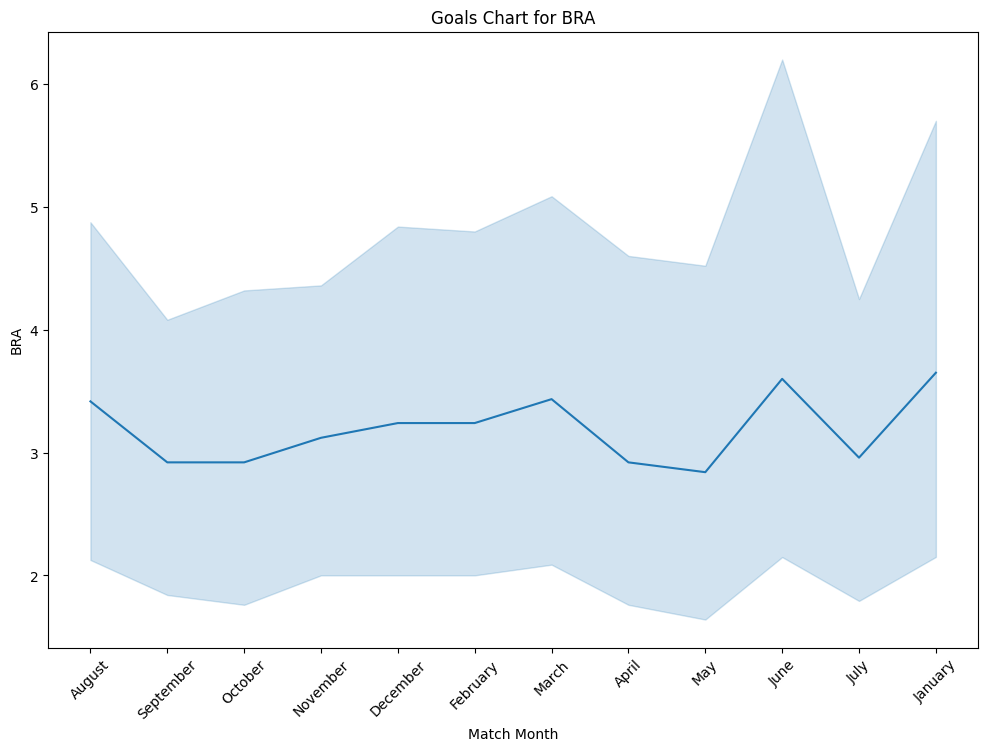

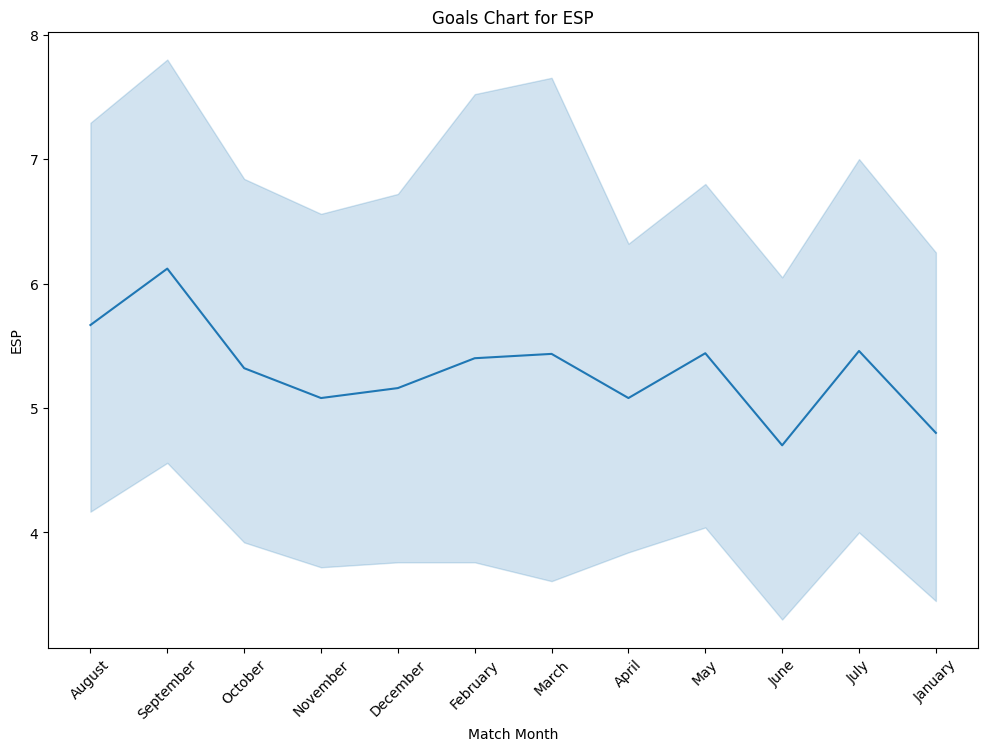

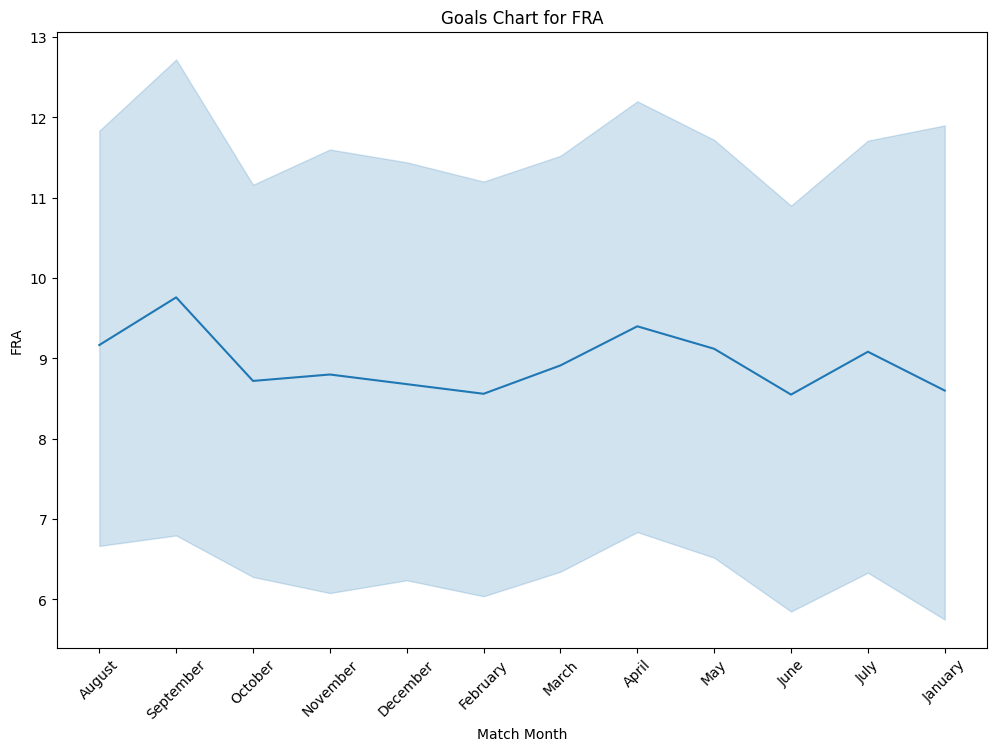

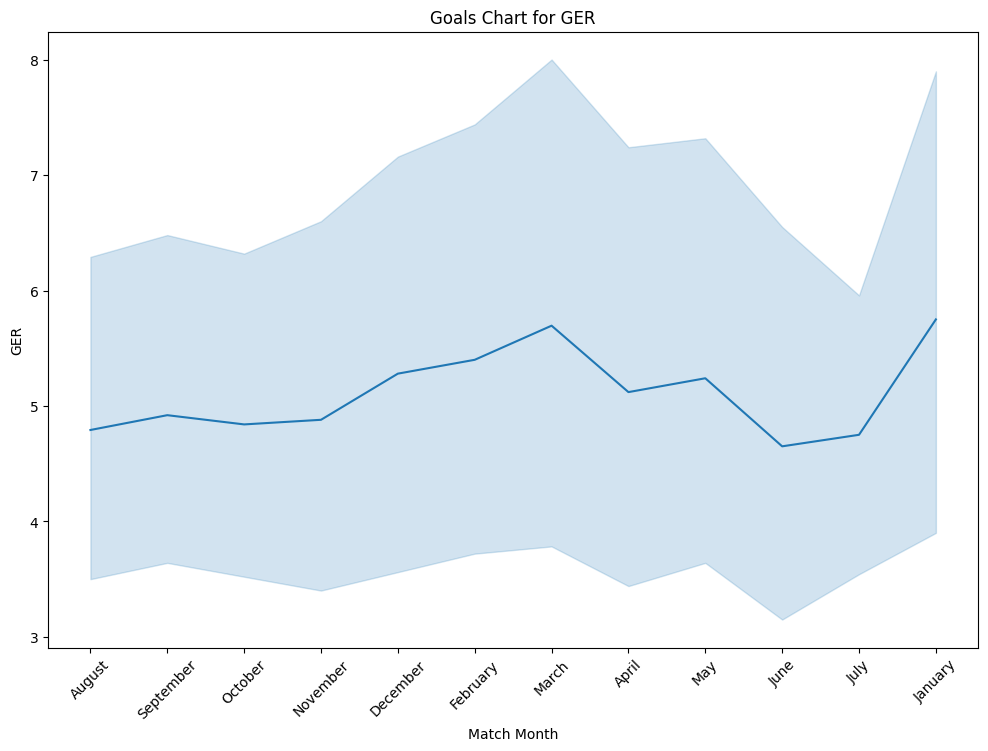

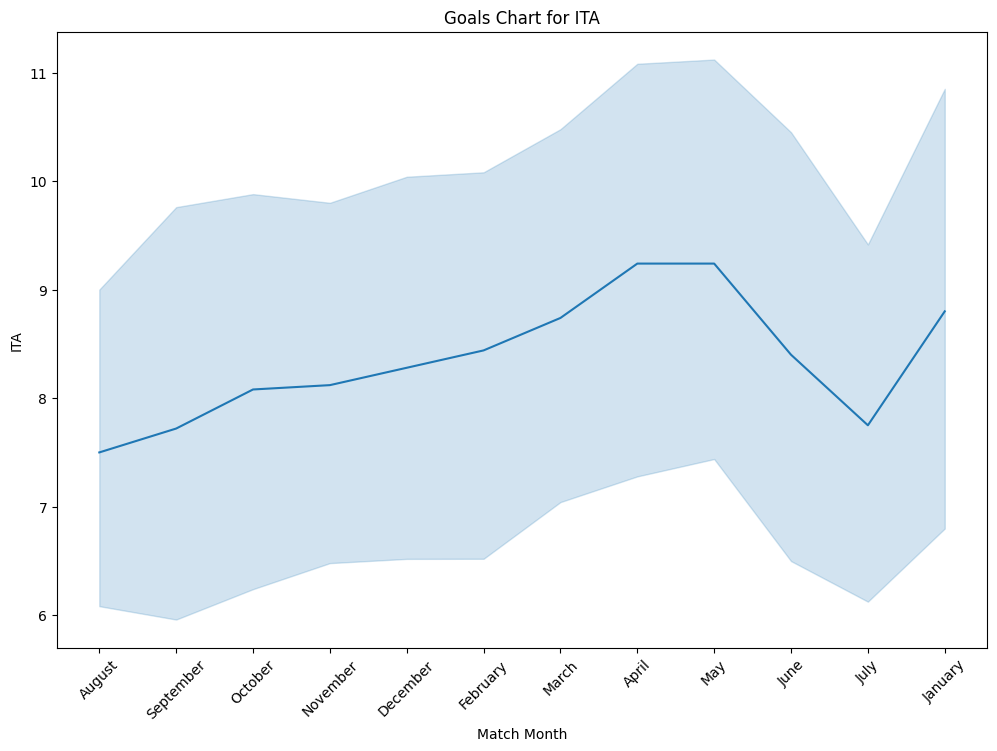

In [42]:
cols= ['ARG', "BRA", 'ESP', 'FRA', 'GER', 'ITA']
for col in cols:
    plt.figure()
    sns.lineplot(data= df, x= 'Match Month', y= col)
    plt.title(f'Goals Chart for {col}')
    plt.xticks(rotation= 45)

In [39]:
df.columns

Index(['Date', 'ARG', 'BRA', 'ESP', 'FRA', 'GER', 'ITA', 'Match Day',
       'Match Month', 'Match Year'],
      dtype='object')

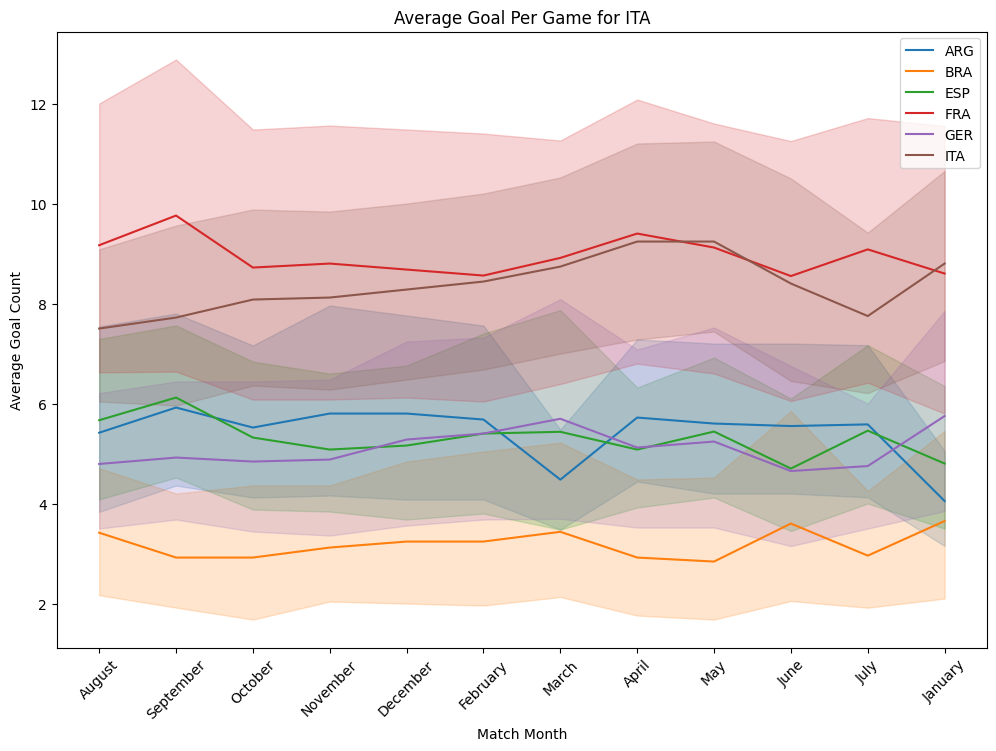

In [43]:
for col in cols:
    sns.lineplot(data= df, x= 'Match Month', y= col, label= col)
    plt.title(f'Average Goal Per Game for {col}')
    plt.xticks(rotation= 45)
    plt.ylabel('Average Goal Count')
plt.legend()

## Year Based Visualization

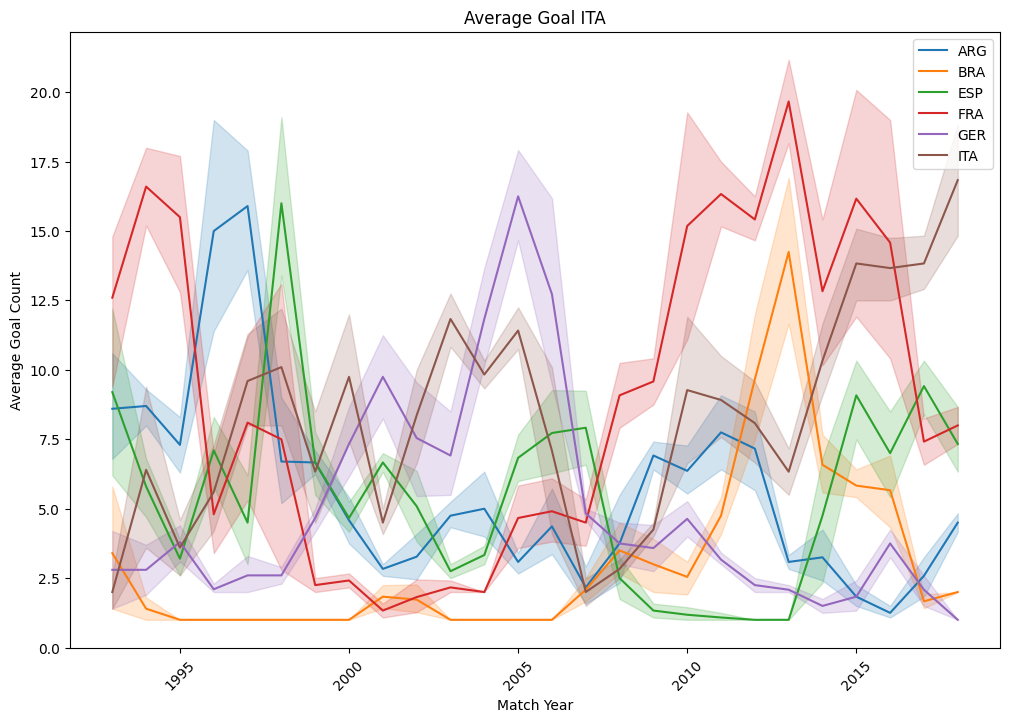

In [45]:
for col in cols:
    sns.lineplot(data= df, x= 'Match Year', y= col, label= col)
    plt.xticks(rotation= 45)
    plt.ylabel('Average Goal Count')
plt.legend()